This script conducts validation tests on the random forest models for the Republican primaries. I withhold one year at a time from the trianing data and then test on all elections from that year. I also create a new 'past_turnout' column for each validation model that does not incorporate the turnout from the year being tested. 

In [74]:
#Import packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn import metrics

In [88]:
#Download data
#Read in data and filter out test data
turnout_train_rep = pd.read_csv("turnout_train_rep.csv")



#filter out 2018 data
turnout_train_rep_use = turnout_train_rep[turnout_train_rep['Year'] != 2018]





R^2:  0.9935124443151984
Mean Absolute Error (MAE): 0.5060082677165356
Mean Squared Error (MSE): 0.5558704029921259


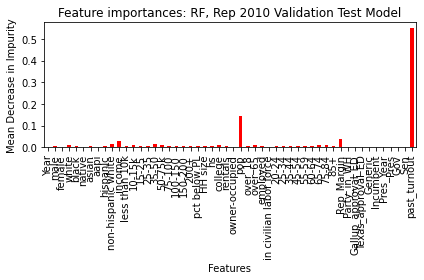

In [89]:
#Validation Test: 2010
np.random.seed(5)

turnout_train_rep_mod = turnout_train_rep_use

#create df for average of past turnout, except for 2018 and 2010.
history_rep = pd.read_csv('history_rep.csv')

history_rep = history_rep[(history_rep['Year'] != 2018) & (history_rep['Year'] != 2010)]
turnout_train_rep_record = history_rep[['Turnout', 'County']]
historical_rep = turnout_train_rep_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2010 in the means
turnout_train_rep_mod = turnout_train_rep_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2010 from testing data
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Year'] != 2010]

#extract feats and outcomes
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_rep_mod['Turnout']


#Create model
rf = RandomForestRegressor()
rf.fit(model_feats, model_outcome);
pred = rf.predict(model_feats)

#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'red')
plt.title("Feature importances: RF, Rep 2010 Validation Test Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()

In [90]:
#Test 2010 gov

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2010 in the means
turnout_train_rep_mod = turnout_train_rep_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2010_Rep_Gov']

#specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_rep_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.6151771773833895
Mean Absolute Error (MAE): 3.587535826771654
Mean Squared Error (MSE): 31.330552896417323


R^2:  0.9818614871591788
Mean Absolute Error (MAE): 0.7170293963254596
Mean Squared Error (MSE): 1.5118033997637803


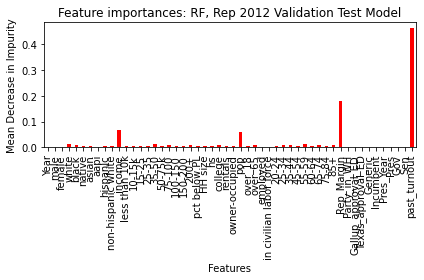

In [91]:
#Validation Test: 2012
np.random.seed(5)

turnout_train_rep_mod = turnout_train_rep_use

#create df for average of past turnout, except for 2018 and 2012.
history_rep = pd.read_csv('history_rep.csv')

history_rep = history_rep[(history_rep['Year'] != 2018) & (history_rep['Year'] != 2012)]
turnout_train_rep_record = history_rep[['Turnout', 'County']]
historical_rep = turnout_train_rep_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_rep_mod = turnout_train_rep_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2012 from testing data
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Year'] != 2012]

#extract feats and outcomes
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_rep_mod['Turnout']


#Create model
rf = RandomForestRegressor()
rf.fit(model_feats, model_outcome);
pred = rf.predict(model_feats)

#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'red')
plt.title("Feature importances: RF, Rep 2012 Validation Test Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()

In [92]:
#Test 2012 sen

np.random.seed(5)

#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_rep_mod = turnout_train_rep_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2012_Rep_Sen']

#specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_rep_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.6985247319646445
Mean Absolute Error (MAE): 3.4359653543307083
Mean Squared Error (MSE): 24.35201906787402


In [93]:
#Test 2012 gov

np.random.seed(5)

#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_rep_mod = turnout_train_rep_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2012_Rep_Pres']

#specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_rep_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.6677778376690872
Mean Absolute Error (MAE): 3.7743629921259845
Mean Squared Error (MSE): 31.035556208425195


R^2:  0.9824528803506565
Mean Absolute Error (MAE): 0.7130984251968502
Mean Squared Error (MSE): 1.4998856556692926


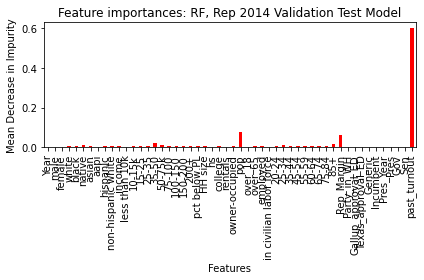

In [94]:
#Validation Test: 2014
np.random.seed(5)

turnout_train_rep_mod = turnout_train_rep_use

#create df for average of past turnout, except for 2018 and 2014.
history_rep = pd.read_csv('history_rep.csv')

history_rep = history_rep[(history_rep['Year'] != 2018) & (history_rep['Year'] != 2014)]
turnout_train_rep_record = history_rep[['Turnout', 'County']]
historical_rep = turnout_train_rep_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_rep_mod = turnout_train_rep_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2014 from testing data
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Year'] != 2014]

#extract feats and outcomes
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_rep_mod['Turnout']


#Create model
rf = RandomForestRegressor()
rf.fit(model_feats, model_outcome);
pred = rf.predict(model_feats)

#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'red')
plt.title("Feature importances: RF, Rep 2014 Validation Test Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()

In [95]:
#Test 2014 gov

np.random.seed(5)

#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_rep_mod = turnout_train_rep_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2014_Rep_Gov']

#specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_rep_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.6606540270385204
Mean Absolute Error (MAE): 3.8358460629921263
Mean Squared Error (MSE): 29.97260727090551


In [96]:
#Test 2014 sen

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_rep_mod = turnout_train_rep_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2014_Rep_Sen']

#specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_rep_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.6771010896809558
Mean Absolute Error (MAE): 3.6311905511811027
Mean Squared Error (MSE): 25.74864810582677
